# Notebook 5: Subgraph Counts and Network Moments
#### Econometric Methods for Social Spillovers and Networks
#### University of St. Gallen, October 1st to 9th, 2018
##### _Bryan S. Graham, UC - Berkeley, bgraham@econ.berkeley.edu_
This is the fifth of a series of iPython Jupyter notebooks designed to accompany a series of instructional lectures given at the St. Gallen University from Oct 1st to Oct 9th, 2018. The scripts below were written for Python 3.6. The Anaconda distribution of Python, available at https://www.continuum.io/downloads, comes bundled with most the scientific computing packages used in these notebooks.
<br>
<br>
For more information about the course please visit my webpage at http://bryangraham.github.io/econometrics/.
<br>
<br>
This notebook presents materials related to subgraph or motif counting. Subgraph counts, with an emphasis on the triad census, were introduced by Holland and Leinhardt (1976). A full distribution theory for subgraph counts is presented by Bickel el al. (2011) -- although important antecedents to this work also exist (including the original Holland and Leinhardt (1976) paper). More references on subgraph counting are provided in my _Handbook of Econometrics_ chapter. The paper by Bhattacharya and Bickel (2015) discusses methods of variance estimation for subgraph counts, which can be computationally intensive.   
<br>
#### References    
Bickel, Peter J. and Chen, Aiyou and Levina, Elizaveta. (2011). "The method of moments and degree distributions for network models," _Annals of Statistics_ 39 (5): 2280 - 2301.  
<br>
Bhattacharya, Sharmodeep and Bickel, Peter J. (2015). "Subsampling bootstrap of count features of networks," _Annals of Statistics_ 43 (6): 2384 - 2411.    
<br>
Holland, Paul W. and Leinhardt, Samuel. (1976). "Local structure in social networks," _Sociological Methodology_ 7: 1- 45.

#### Code citation:
Graham, Bryan S. (2018). "Notebook 5: Subgraph Counts and Network Moments: St. Gallen Social and Economic Networks Course Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 20 September 2018)

In [1]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Import main scientific computing modules
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy as sp
import scipy.optimize
import scipy.stats
import pandas as pd
import itertools as it

# Import speed-up modules
from numba import jit, vectorize
import numexpr as ne

# Directory where data files are stored and graphics files will be saved
data =     '/Users/bgraham/Dropbox/Teaching/Short_Courses/St_Gallen/2018/Data/'
graphics = '/Users/bgraham/Dropbox/Teaching/Short_Courses/St_Gallen/2018/Graphics/'

This gets rid of an irritating deprecation warning that I have been unable to adjust my code directly to eliminate.

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

This first block of code draws all isomorphisms of two and three node (undirected) subgraph configurations. These images can be rendered inline in LaTex documents. To do this add the command "\usepackage{graphicx}" to your preamble and also add the line "\graphicspath{{/Directory/Where/Your/Image/Files/Are/}}". Then in a math environment the following command will cause an image to be placed inline: "\vcenter{\hbox{\includegraphics[scale=0.50]{triangle.eps}}}". Adjust the scale number to change the sizing of the imagine.

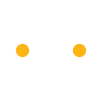

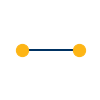

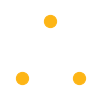

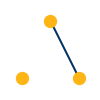

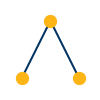

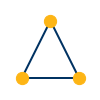

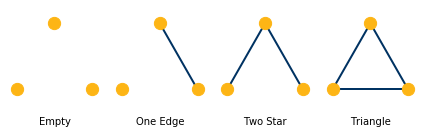

In [3]:
#---------------------------------#
#- Subgraphs with two agents     -#
#---------------------------------#

noedge=nx.Graph()                       # unconnected dyad  
noedge.add_nodes_from([1,2])

edge=nx.Graph()                         # connected dyad  
edge.add_nodes_from(noedge)
edge.add_edges_from([(1,2)])

# Generate figures for dyad configurations
# Position nodes on a line
node_pos = {1: [0,0.5], 2: [1,0.5]} 

# Empty dyad
noedge_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = noedge_fig.add_subplot(1,1,1)
nx.draw_networkx(noedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'noedge.eps', bbox_inches='tight', dpi=500)  

# Connected dyad
edge_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = edge_fig.add_subplot(1,1,1)
nx.draw_networkx(edge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'edge.eps', bbox_inches='tight', dpi=500)  

#---------------------------------#
#- Subgraphs with three agents   -#
#---------------------------------#

empty=nx.Graph()                        # Empty triad
empty.add_nodes_from([1,2,3])

oneedge=nx.Graph()                      # One edge triad       
oneedge.add_nodes_from(empty)
oneedge.add_edges_from([(1,2)])

twostar=nx.Graph()                      # Two star triad
twostar.add_nodes_from(empty)
twostar.add_edges_from([(1,2),(1,3)])

triangle=nx.Graph()                     # Triangle triad   
triangle.add_nodes_from(empty)
triangle.add_edges_from([(1,2),(1,3),(2,3)])

# Position nodes in the shape of a triangle
node_pos = {1: [0.5,1], 2: [1,0], 3: [0,0]} 

# Empty triad
empty_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off') 
ax = empty_fig.add_subplot(1,1,1)
nx.draw_networkx(empty, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'empty.eps', bbox_inches='tight', dpi=500)  

# One edge triad
oneedge_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off') 
ax = oneedge_fig.add_subplot(1,1,1)
nx.draw_networkx(oneedge, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'oneedge.eps', bbox_inches='tight', dpi=500)  

# Two star triad
twostar_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off') 
ax = twostar_fig.add_subplot(1,1,1)
nx.draw_networkx(twostar, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'twostar.eps', bbox_inches='tight', dpi=500)  

# Triangle triad
triangle_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off') 
ax = triangle_fig.add_subplot(1,1,1)
nx.draw_networkx(triangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'triangle.eps', bbox_inches='tight', dpi=500)

#---------------------------------------------------------------------#
#- Create figure object to plot all 4 triad isomorphisms with titles -#
#---------------------------------------------------------------------#

triad_isomorphisms = [empty, oneedge, twostar, triangle]

triad_isomorphism_names = ["Empty", "One Edge", "Two Star", "Triangle"]

# Position nodes in the shape of a triangle
node_pos = {1: [1,1], 2: [2,0], 3: [0,0]} 

triad_isomorphisms_fig = plt.figure(figsize=(6, 2))

for triad in range(0,len(triad_isomorphisms)):
    ax = 'ax'+str(triad)
    ax = triad_isomorphisms_fig.add_subplot(1,4,triad+1)
    
    # Draw Isomorphism
    nx.draw_networkx(triad_isomorphisms[triad], pos = node_pos, with_labels=False, node_color='#FDB515', \
                     node_size = 150, \
                     edge_color='#003262', width=2)
    
    plt.axis('off') 
    ax.axes.set_xlim([-0.25,2.25])
    ax.axes.set_ylim([-0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(triad_isomorphism_names[triad] , fontsize=10, y = -0.25)
    
# Save result
plt.tight_layout()
plt.savefig(graphics+'undirected_triad_isomorphisms_fig.eps', bbox_inches='tight', dpi=500)
plt.savefig(graphics+'undirected_triad_isomorphisms_fig.png', bbox_inches='tight', dpi=500)  

This next block of code draws all tetrad isomorphisms.

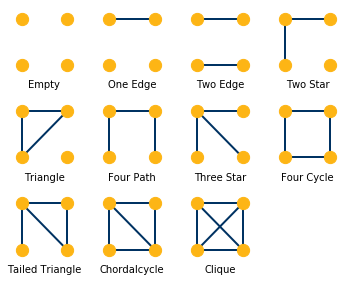

In [4]:
#---------------------------------#
#- Subgraphs with four agents    -#
#---------------------------------#

tetradempty=nx.Graph()                   # Empty
tetradempty.add_nodes_from([1,2,3,4])

tetradoneedge=nx.Graph()                 # One edge
tetradoneedge.add_nodes_from([1,2,3,4])
tetradoneedge.add_edges_from([(1,2)])

tetradtwoedge=nx.Graph()                 # Two edge
tetradtwoedge.add_nodes_from([1,2,3,4])
tetradtwoedge.add_edges_from([(1,2),(3,4)])

tetradtwostar=nx.Graph()                 # Two star
tetradtwostar.add_nodes_from([1,2,3,4])
tetradtwostar.add_edges_from([(1,2),(1,4)])

tetradonetriangle=nx.Graph()             # One triangle 
tetradonetriangle.add_nodes_from([1,2,3,4])
tetradonetriangle.add_edges_from([(1,2),(1,4),(2,4)])

fourpath=nx.Graph()                      # Four path
fourpath.add_nodes_from([1,2,3,4])
fourpath.add_edges_from([(1,4),(1,2),(2,3)])

onethreewheel=nx.Graph()                 # (1,3) wheel or 3-star
onethreewheel.add_nodes_from([1,2,3,4])
onethreewheel.add_edges_from([(1,2),(1,3),(1,4)])

fourcycle=nx.Graph()                     # Four cycle or square tetrad  
fourcycle.add_nodes_from([1,2,3,4])
fourcycle.add_edges_from([(1,2),(2,3),(3,4),(4,1)])

tailedtriangle=nx.Graph()                # Tailed triangle
tailedtriangle.add_nodes_from([1,2,3,4])
tailedtriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4)])

chordalcycle=nx.Graph()                  # Four chordalcycle
chordalcycle.add_nodes_from([1,2,3,4])
chordalcycle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4)])

clique=nx.Graph()                        # Four clique
clique.add_nodes_from([1,2,3,4])
clique.add_edges_from([(1,2),(1,3),(2,3),(1,4),(3,4),(2,4)])

#----------------------------------------------------------------#
#- Create figure object to plot all 11 isomorphisms with titles -#
#----------------------------------------------------------------#

tetrad_isomorphisms = [tetradempty, tetradoneedge, tetradtwoedge, tetradtwostar, tetradonetriangle, \
                       fourpath, onethreewheel, fourcycle, tailedtriangle, chordalcycle, clique]

tetrad_isomorphism_names = ["Empty", "One Edge", "Two Edge", "Two Star", "Triangle", "Four Path", \
                            "Three Star", "Four Cycle", "Tailed Triangle", "Chordalcycle", "Clique"]

# Position nodes in the shape of a square
node_pos = {1: [0,1], 2: [1,1], 3: [1,0], 4: [0,0]} 

tetrad_isomorphisms_fig = plt.figure(figsize=(5, 4))

for tetrad in range(0,len(tetrad_isomorphisms)):
    ax = 'ax'+str(tetrad)
    ax = tetrad_isomorphisms_fig.add_subplot(3,4,tetrad+1)
  
    # Draw Isomorphism
    nx.draw_networkx(tetrad_isomorphisms[tetrad], pos = node_pos, with_labels=False, node_color='#FDB515', \
                     node_size = 150, \
                     edge_color='#003262', width=2)
    
    plt.axis('off') 
    ax.axes.set_xlim([-0.25,1.25])
    ax.axes.set_ylim([-0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(tetrad_isomorphism_names[tetrad] , fontsize=10, y = -0.25)
    
# Save result
plt.tight_layout()
plt.savefig(graphics+'undirected_tetrad_isomorphisms_fig.eps', bbox_inches='tight', dpi=500)  
plt.savefig(graphics+'undirected_tetrad_isomorphisms_fig.png', bbox_inches='tight', dpi=500)  

Next create untitled individual plots of all 11 tetrad isomorphisms for inline placement.

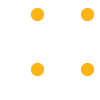

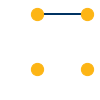

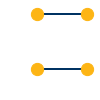

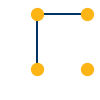

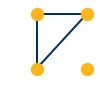

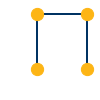

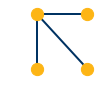

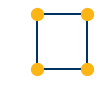

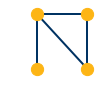

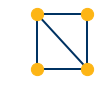

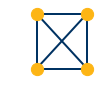

In [5]:
#------------------------------------------------------------------#
#- Create untitled individual plots of all 11 tetrad isomorphisms -#
#------------------------------------------------------------------#

tetrad_isomorphism_files = ["tetradempty", "tetradoneedge", "tetradtwoedge", "tetradtwostar", "tetradonetriangle", \
                            "fourpath", "onethreewheel", "fourcycle", "tailedtriangle", "chordalcycle", "clique"]


for tetrad in range(0,len(tetrad_isomorphisms)):

    tetrad_fig = plt.figure(figsize=(1.5, 1.5))
    ax = triangle_fig.add_subplot(1,1,1)
    plt.axis('off') 
    nx.draw_networkx(tetrad_isomorphisms[tetrad], pos = node_pos, with_labels=False, node_color='#FDB515', \
                     node_size = 150, \
                     edge_color='#003262', width=2)
    
    ax.axes.set_xlim([-0.25,1.25])
    ax.axes.set_ylim([-0.25,1.25])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
   
    # Save result
    plt.tight_layout()
    plt.savefig(graphics+tetrad_isomorphism_files[tetrad]+'.eps', bbox_inches='tight', dpi=500)

This plots a subset of all possible pentad wirings.

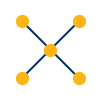

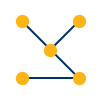

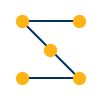

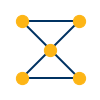

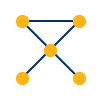

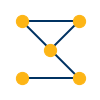

In [6]:
#-----------------------------------#
#- Subgraphs with five agents      -#
#-----------------------------------#

emptypentad=nx.Graph()                  # empty pentad  
emptypentad.add_nodes_from([1,2,3,4,5])

fourstar=nx.Graph()                     # 4-star  
fourstar.add_nodes_from(emptypentad)
fourstar.add_edges_from([(1,2),(1,3),(1,4),(1,5)])

tailedthreestar=nx.Graph()              # tailed 3-star  
tailedthreestar.add_nodes_from(emptypentad)
tailedthreestar.add_edges_from([(1,2),(1,3),(1,4),(4,5)])

fivepath=nx.Graph()                     # 5-path  
fivepath.add_nodes_from(emptypentad)
fivepath.add_edges_from([(1,2),(2,3),(1,4),(4,5)])

twotriangle=nx.Graph()                  # 2-triangle  
twotriangle.add_nodes_from(emptypentad)
twotriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(1,5),(4,5)])

twotailedtriangle=nx.Graph()            # 2-tailed triangle  
twotailedtriangle.add_nodes_from(emptypentad)
twotailedtriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(1,5)])

rattailedtriangle=nx.Graph()            # rat tailed triangle  
rattailedtriangle.add_nodes_from(emptypentad)
rattailedtriangle.add_edges_from([(1,2),(1,3),(2,3),(1,4),(4,5)])

# Generate figures for dyad configurations
# Position nodes on a line
node_pos = {1: [0.5,0.5], 2: [0,1], 3: [1,1], 4: [1,0], 5: [0,0]}

# 4-star
fourstar_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = fourstar_fig.add_subplot(1,1,1)
nx.draw_networkx(fourstar, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'fourstar.eps', bbox_inches='tight', dpi=500)  

# tailed 3-star  
tailedthreestar_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = tailedthreestar_fig.add_subplot(1,1,1)
nx.draw_networkx(tailedthreestar, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'tailedthreestar.eps', bbox_inches='tight', dpi=500)  

# 5-path  
fivepath_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = fivepath_fig.add_subplot(1,1,1)
nx.draw_networkx(fivepath, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'fivepath.eps', bbox_inches='tight', dpi=500)  

# 2-triangle  
twotriangle_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = twotriangle_fig.add_subplot(1,1,1)
nx.draw_networkx(twotriangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'twotriangle.eps', bbox_inches='tight', dpi=500)  

# 2-tailed triangle  
twotailedtriangle_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = twotailedtriangle_fig.add_subplot(1,1,1)
nx.draw_networkx(twotailedtriangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'twotailedtriangle.eps', bbox_inches='tight', dpi=500)  

# rat-tailed triangle  
rattailedtriangle_fig = plt.figure(figsize=(1.5, 1.5))
plt.axis('off')    
ax = rattailedtriangle_fig.add_subplot(1,1,1)
nx.draw_networkx(rattailedtriangle, pos=node_pos, with_labels=False, node_color='#FDB515', node_size = 150, \
                 edge_color='#003262', width=2)
ax.axes.set_xlim([-0.25,1.25])
ax.axes.set_ylim([-0.25,1.25])
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Save result
plt.tight_layout()
plt.savefig(graphics+'rattailedtriangle.eps', bbox_inches='tight', dpi=500)  

## $W_{q,S}$ for S a two star and $q = 1, 2$

All possible graphlet stitchings of a pair of two-stars with a single node in common.

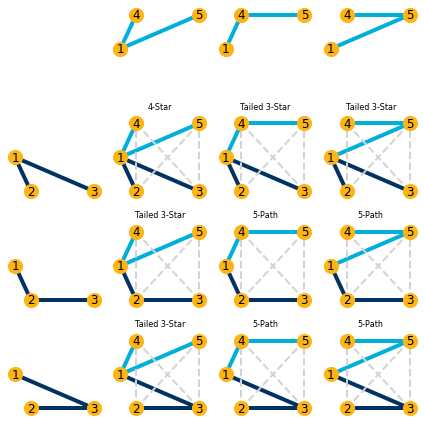

In [7]:
#-------------------------------------#
#- Construct set of possible T and U -#
#- unions with exactly q nodes in    -#
#- common.                           -#
#-------------------------------------#

#--------------------------------------------------#
#- CASE: T,U equals S = two star triad with q = 1 -#
#--------------------------------------------------#

# Node lists for T and U with q nodes in common
T_nodes = [1,2,3]
U_nodes = [1,4,5]

# List of isomorphisms of S on node sets for T and U
T_iso  = [[(1,2),(1,3)],[(1,2),(2,3)],[(1,3),(2,3)]]
U_iso  = [[(1,4),(1,5)],[(1,4),(4,5)],[(1,5),(4,5)]]
non_overlapping_dyads = [(2,4),(2,5),(3,4),(3,5)]

# Initialize set of allowable unions of T and U
W_q_set    = []

# Form initial list of possible W_q wirings
# Loop over all pairs of T and U wirings and join
# edge lists to create a W_q Graph if valid to do so
for T in T_iso:
    for U in U_iso:
        
        # Check to make sure that if
        # nodes i & j are in both T and U, then
        # if edge (i,j) is in T it is also in U (and vice versa)
        
        valid_W_q = True
        
        for edge in T:
            if all(node in U_nodes for node in edge) and edge not in U and (edge[1], edge[0]) not in U:
                valid_W_q = False
                
        for edge in U:
            if all(node in T_nodes for node in edge) and edge not in T and (edge[1], edge[0]) not in T:
                valid_W_q = False
        
        if valid_W_q:
            W_q = nx.Graph(copies = 1)
            W_q.add_nodes_from([1,2,3,4,5])
            
            # Edges in T, but not U
            W_q.add_edges_from(list(set(T).difference(set(U))), color='#003262', style='solid', width = 4) 
            
            # Edges in U, but not T
            W_q.add_edges_from(list(set(U).difference(set(T))), color='#00B0DA', style='solid', width = 4)    
            
            # Edges in both T & U
            W_q.add_edges_from(list(set(T).intersection(set(U))), color='#EE1F60', style='dashed', width = 4) 
            
            W_q_set.append(W_q)                                                                    

# Add in possible edges between nonoverlapping nodes T & U
for W_q in W_q_set:
    W_q.add_edges_from(non_overlapping_dyads, color='#D3D3D3', style='dashed', width = 2)              
            
            
# Loop over all distinct pairs of W_q edge lists and construct multiset
W_q_multiset = W_q_set[:]
for (G,H) in it.combinations(W_q_multiset, 2):
    # If isomorphism found then remove second graph/edge list from W_q_multiset
    if nx.is_isomorphic(G,H):
        G.graph['copies'] += 1           # increment isomorphism count on retained exemplar
        if H in W_q_multiset:            # remove found isomorphism
            W_q_multiset.remove(H)
        
#--------------------------------#
#- Draw W_q set                 -#
#--------------------------------#

W_q1_twostar_fig = plt.figure(figsize=(6, 6))

# Unions of two star graphlets defined on five nodes (i.e., one node in common)
# Position Nodes
node_pos = {1: [-3,0], 2: [-2,-2], 3: [2,-2], 4: [-2,2], 5: [2,2]} 

s = 0
for w in [6, 7, 8, 10, 11, 12, 14, 15, 16]:
        
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(4,4,w)
  
    # Get colors and styles for edges
    edges, colors = zip(*nx.get_edge_attributes(W_q_set[s],'color').items())  
    edges, styles = zip(*nx.get_edge_attributes(W_q_set[s],'style').items())  
    edges, widths = zip(*nx.get_edge_attributes(W_q_set[s],'width').items())  

    # Draw current wiring
    nx.draw_networkx(W_q_set[s], pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                     edgelist=edges, edge_color=colors, style=styles, width=widths, arrows=True)
    
    stitching_names = ['4-Star', 'Tailed 3-Star', 'Tailed 3-Star', \
                       'Tailed 3-Star', '5-Path', '5-Path', \
                       'Tailed 3-Star', '5-Path', '5-Path']
    
    plt.axis('off') 
    ax.axes.set_xlim([-3.5,2.5])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(stitching_names[s], fontsize=8)
    
    # Increment counter
    s += 1

s = 0    
for w in [2, 3, 4]:
        
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(4,4,w)  
    
    nx.draw_networkx(nx.Graph(U_iso[s]), pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                     edge_color= '#00B0DA', width = 4, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-3.5,2.5])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    s += 1
    
s = 0    
for w in [5, 9, 13]:
        
    ax = 'ax'+str(w)
    ax = W_q1_twostar_fig.add_subplot(4,4,w)  
    
    nx.draw_networkx(nx.Graph(T_iso[s]), pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                     edge_color= '#003262', width = 4, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-3.5,2.5])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    s += 1    

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q1_twostar.png', dpi=500) 

All possible graphlet stitchings of a pair of two-stars with two nodes in common.

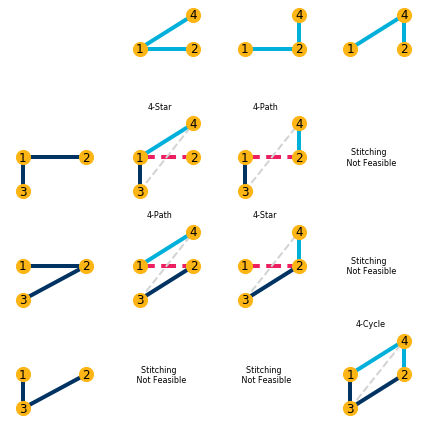

In [8]:
#-------------------------------------#
#- Construct set of possible T and U -#
#- unions with exactly q nodes in    -#
#- common.                           -#
#-------------------------------------#

#--------------------------------------------------#
#- CASE: T,U equals S = two star triad with q = 2 -#
#--------------------------------------------------#

# Node lists for T and U with q nodes in common
T_nodes = [1,2,3]
U_nodes = [1,2,4]

# List of isomorphisms of S on node sets for T and U
T_iso  = [[(1,2),(1,3)],[(1,2),(2,3)],[(1,3),(2,3)]]
U_iso  = [[(1,2),(1,4)],[(1,2),(2,4)],[(1,4),(2,4)]]
non_overlapping_dyads = [(3,4)]

# Initialize set of allowable unions of T and U
W_q_set    = []

# Form initial list of possible W_q wirings
# Loop over all pairs of T and U wirings and join
# edge lists to create a W_q Graph if valid to do so
for T in T_iso:
    for U in U_iso:
        
        # Check to make sure that if
        # nodes i & j are in both T and U, then
        # if edge (i,j) is in T it is also in U (and vice versa)
        
        valid_W_q = True
        
        for edge in T:
            if all(node in U_nodes for node in edge) and edge not in U and (edge[1], edge[0]) not in U:
                valid_W_q = False
                
        for edge in U:
            if all(node in T_nodes for node in edge) and edge not in T and (edge[1], edge[0]) not in T:
                valid_W_q = False
                
        if valid_W_q:
            W_q = nx.Graph(copies = 1)
            W_q.add_nodes_from([1,2,3,4])
            
            # Edges in T, but not U
            W_q.add_edges_from(list(set(T).difference(set(U))), color='#003262', style='solid', width = 4) 
            
            # Edges in U, but not T
            W_q.add_edges_from(list(set(U).difference(set(T))), color='#00B0DA', style='solid', width = 4)    
            
            # Edges in both T & U
            W_q.add_edges_from(list(set(T).intersection(set(U))), color='#EE1F60', style='dashed', width = 4) 
            
            W_q_set.append(W_q)
        else:
            W_q_set.append("Stitching not feasible")
            

# Add in possible edges between nonoverlapping nodes T & U
for W_q in W_q_set:
    if W_q != "Stitching not feasible":
        W_q.add_edges_from(non_overlapping_dyads, color='#D3D3D3', style='dashed', width = 2)              
            
            
# Loop over all distinct pairs of W_q edge lists and construct multiset
W_q_multiset = [W_q for W_q in W_q_set if W_q != "Stitching not feasible"]
for (G,H) in it.combinations(W_q_multiset, 2):
    # If isomorphism found then remove second graph/edge list from W_q_multiset
    if nx.is_isomorphic(G,H):
        G.graph['copies'] += 1           # increment isomorphism count on retained exemplar
        if H in W_q_multiset:            # remove found isomorphism
            W_q_multiset.remove(H)
        
#--------------------------------#
#- Draw W_q set                 -#
#--------------------------------#

W_q2_twostar_fig = plt.figure(figsize=(6, 6))

# Unions of twostar triad graphlets defined on four nodes (i.e., two nodes in common)
# Position Nodes
node_pos = {1: [-2,0], 2: [2,0], 3: [-2,-2], 4: [2,2]} 

s = 0
for w in [6, 7, 8, 10, 11, 12, 14, 15, 16]:
        
    ax = 'ax'+str(w)
    ax = W_q2_twostar_fig.add_subplot(4,4,w)
  
    if W_q_set[s] != "Stitching not feasible":
     
        # Get colors and styles for edges
        edges, colors = zip(*nx.get_edge_attributes(W_q_set[s],'color').items())  
        edges, styles = zip(*nx.get_edge_attributes(W_q_set[s],'style').items())  
        edges, widths = zip(*nx.get_edge_attributes(W_q_set[s],'width').items())  

        # Draw current wiring
        nx.draw_networkx(W_q_set[s], pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                         edgelist=edges, edge_color=colors, style=styles, width=widths, arrows=True)
    
    else:
        plt.text(0.5,0.5,'Stitching \n Not Feasible', horizontalalignment='center', verticalalignment='center', \
                    transform = ax.transAxes, fontsize=8)
    
    stitching_names = ['4-Star', '4-Path', '', \
                       '4-Path', '4-Star', '', \
                       '', '', '4-Cycle']
    
    plt.axis('off') 
    ax.axes.set_xlim([-4,3])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    # Add title
    plt.title(stitching_names[s], fontsize=8)
    
    # Increment counter
    s += 1

s = 0    
for w in [2, 3, 4]:
        
    ax = 'ax'+str(w)
    ax = W_q2_twostar_fig.add_subplot(4,4,w)  
    
    nx.draw_networkx(nx.Graph(U_iso[s]), pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                     edge_color= '#00B0DA', width = 4, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-4,3])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    s += 1
    
s = 0    
for w in [5, 9, 13]:
        
    ax = 'ax'+str(w)
    ax = W_q2_twostar_fig.add_subplot(4,4,w)  
    
    nx.draw_networkx(nx.Graph(T_iso[s]), pos = node_pos, with_labels=True, node_color='#FDB515', node_size = 200, \
                     edge_color= '#003262', width = 4, arrows=True)
    
    plt.axis('off') 
    ax.axes.set_xlim([-3,3])
    ax.axes.set_ylim([-2.5,2.5])
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    s += 1        

# Save result
plt.tight_layout()
plt.savefig(graphics+'W_q2_twostar.png', dpi=500) 

## Calculate the standard error of the transitivity index
This next block of code defines a function which calculates the variance-covariance matrix for the estimated two-star and triad frequencies. The basic method is as outlined in Bhattacharya and Bickel (2015). The function is not especially fast to execute, but is sufficient for small and medium-sized networks (up to a few hundred nodes). Clearly improving scaleability of this implementation would be very valuable.

In [9]:
import random

def random_combination(iterable, r):
    "Random selection from itertools.combinations(iterable, r)"
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.sample(range(n), r))
    return tuple(pool[i] for i in indices)

def transitivity(G, B=None, display=True):
    
    """
    This function computes the induced subgraph frequency of two stars and triangles in
    network G. It also computes a variance-covariance matrix for these freqencies using
    the approach outlined in Bickel and Bhattacharya (Annals of Statistics, 2015). The
    transitivity coefficient is also estimated and its variance calculated using the
    delta method.
    
    INPUTS:
    -------
    G        : a networkx graph object (undirected)
    B        : number of subsamples to take for variance estimation. If None use all relevant subgraphs.
    display  : if true then display results, otherwise suppress output
    
    OUTPUTS:
    --------
    P        : 2 x 1 numpy 2d array with P(triangle) and P(two-star) as elements
    OMEGA    : 2 x 2 numpy 2d variance-covariance of P based on B pentad subsamples
    TI       : transtivity index (scalar)
    VAR_TI   : variance of transitivity index (via delta method, also scalar)
    
    FUNCTIONS CALLED:
    -----------------
    ...random_combination()...
    
    """
    
    # Functions using the numexpr module to quickly evaluate the summands entering XI_q1 matrix
    # of the variance-covariance matrix OMEGA
    
    def XIq1_00(D_ij, D_ik, D_jk, D_il, D_im, D_lm):
       
        return ne.evaluate('D_ij*D_ik*D_jk*D_il*D_im*D_lm')
    
    def XIq1_01(D_ij, D_ik, D_jk, D_il, D_im, D_lm):
       
        return ne.evaluate('D_ij*D_ik*D_jk*((1-D_il)*D_im*D_lm + D_il*(1-D_im)*D_lm + D_il*D_im*(1-D_lm))')
    
    def XIq1_11(D_ij, D_ik, D_jk, D_il, D_im, D_lm):
       
        return ne.evaluate('((1-D_ij)*D_ik*D_jk + D_ij*(1-D_ik)*D_jk + D_ij*D_ik*(1-D_jk))*((1-D_il)*D_im*D_lm + D_il*(1-D_im)*D_lm + D_il*D_im*(1-D_lm))')
        
    N = len(G.nodes())
    D = np.asarray(nx.to_numpy_matrix(G))
    
    # Normalize mean and variance vector/matrix
    P       = np.array([[0.],[0.]])    
    XIq1    = np.array([[0.,0.],[0.,0.]])
            
    #---------------------------------------------------------#
    #- Calculate the number of triangles and two-stars in G  -#
    #---------------------------------------------------------#
   
    triad_census = nx.triadic_census(G.to_directed())
    P[0,0] = triad_census['300']
    P[1,0] = (1/3)*triad_census['201']
          
    # Normalize subgraph counts by (N choose 3)
    P = P/((N*(N-1)*(N-2))//6)
 
    #---------------------------------------------------------#
    #- Calculate the terms needed to compute the variance    -#
    #---------------------------------------------------------#
    
    D = D.reshape(-1)               # Reshape adjacency matrix into a 1-d 

    if B:
        # Take random sample (without replacement) of B pentads to use for variance computation
        pentads = np.asarray(random_combination(it.combinations(range(0,N), 5), B), dtype='int')
    else:
        # Use all pentads in variance computation
        B = sp.special.binom(N, 5)
        pentads = np.asarray(list(it.combinations(range(0,N), 5)), dtype='int')
    
    # Construct multi-indices for each of 3 dyads in the 10 triads in each pentad
    # This shows where to find these dyads in a vectorized version of an N x N matrix
    ijk = [np.ravel_multi_index([pentads[:,0], pentads[:,1]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,2]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,2]], (N,N))]
    ijl = [np.ravel_multi_index([pentads[:,0], pentads[:,1]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,3]], (N,N))]
    ijm = [np.ravel_multi_index([pentads[:,0], pentads[:,1]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,4]], (N,N))]
    ikl = [np.ravel_multi_index([pentads[:,0], pentads[:,2]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,2], pentads[:,3]], (N,N))]
    ikm = [np.ravel_multi_index([pentads[:,0], pentads[:,2]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,2], pentads[:,4]], (N,N))]
    ilm = [np.ravel_multi_index([pentads[:,0], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,0], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,3], pentads[:,4]], (N,N))]
    jkl = [np.ravel_multi_index([pentads[:,1], pentads[:,2]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,2], pentads[:,3]], (N,N))]
    jkm = [np.ravel_multi_index([pentads[:,1], pentads[:,2]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,2], pentads[:,4]], (N,N))]
    jlm = [np.ravel_multi_index([pentads[:,1], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,1], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,3], pentads[:,4]], (N,N))]
    klm = [np.ravel_multi_index([pentads[:,2], pentads[:,3]], (N,N)), \
           np.ravel_multi_index([pentads[:,2], pentads[:,4]], (N,N)), \
           np.ravel_multi_index([pentads[:,3], pentads[:,4]], (N,N))]
       
    # All 30 pairs of the 10 triads sharing exactly one agent in common
    triad_pairs = [(ijk, ilm), (ijk, jlm), (ijk, klm), \
                   (ijl, ikm), (ijl, jkm), (ijl, klm), \
                   (ijm, ikl), (ijm, jkl), (ijm, klm), \
                   (ikl, ijm), (ikl, jkm), (ikl, jlm), \
                   (ikm, ijl), (ikm, jkl), (ikm, jlm), \
                   (ilm, ijk), (ilm, jkl), (ilm, jkm), \
                   (jkl, ijm), (jkl, ikm), (jkl, ilm), \
                   (jkm, ijl), (jkm, ikl), (jkm, ilm), \
                   (jlm, ijk), (jlm, ikl), (jlm, ikm), \
                   (klm, ijk), (klm, ijl), (klm, ijm)]
    
    # loop over all 30 pairs of triads in a pentad and compute elements
    # of XIq1 matrix using the fast numexpr functions defined above
    for pair in triad_pairs:
        
        ij, ik, jk = pair[0]
        il, im, lm = pair[1]
        
        
        XIq1[0,0] +=       np.sum(XIq1_00(D[ij],D[ik],D[jk],D[il],D[im],D[lm]))
        XIq1[0,1] += (1/3)*np.sum(XIq1_01(D[ij],D[ik],D[jk],D[il],D[im],D[lm]))
        XIq1[1,1] += (1/9)*np.sum(XIq1_11(D[ij],D[ik],D[jk],D[il],D[im],D[lm]))
    
    # Divide by the number of pairs of triads considered to get estimated expectations
    XIq1 = XIq1/(B*30)
        
    # Fill in other covariance term symmetrically
    XIq1[1,0] = XIq1[0,1]
    
    # Define kappa constant
    kappa_3_N = ((N-3)*(N-4)*(N-5))/(N*(N-1)*(N-2))
    
    # Construct variance-covariance matrix
    OMEGA = 9*(kappa_3_N/(N-5))* (XIq1 - P @ P.T) + \
            6*(kappa_3_N/((N-3)*(N-4)*(N-5)))*(np.diag(np.ravel(P)) - P @ P.T)
    
    # Estimate transitivity index    
    TI = P[0,0]/(P[1,0] + P[0,0])    
    
    # Estimate variance using the delta method
    C = (TI/P[0,0])*np.array([[1-TI, -TI]])
    VAR_TI = np.asscalar(C @ OMEGA @ C.T)
    
    if display:
        print("%s %s %s" % ('Triad'.ljust(20), 'Frequency'.rjust(15), '(Std. Err)'.rjust(10)))
        print("--------------------------------------------------")
        print("%s %s %s" % ('Triangle'.ljust(20), '{0:.6f}'.format(P[0,0]).rjust(15), '(' + '{0:.8f}'.format(OMEGA[0,0]**(1/2)).rjust(10) + ')') )
        print("%s %s %s" % ('Two-Star'.ljust(20), '{0:.6f}'.format(P[1,0]).rjust(15), '(' + '{0:.8f}'.format(OMEGA[1,1]**(1/2)).rjust(10) + ')') )
        print("--------------------------------------------------")
        print("%s %s %s" % ('Transitivity Index'.ljust(20), '{0:.6f}'.format(TI).rjust(15), '(' + '{0:.8f}'.format(VAR_TI**(1/2)).rjust(10) + ')') )
    
    return [P, OMEGA, TI, VAR_TI]

Next read in the Nyakatoke adjacency matrix and use the function above to compute an estimate of the Transitivity index and an accompanying standard error.

In [10]:
# Read in Nyakatoke adjacency matrix
from scipy import io
D = io.mmread(data+"Created/Nyakatoke_Adjacency.mtx")
G = nx.Graph(D)

In [11]:
[P, OMEGA, TI, VAR_TI] = transitivity(G)

Triad                      Frequency (Std. Err)
--------------------------------------------------
Triangle                    0.001150 (0.00029897)
Two-Star                    0.004955 (0.00100173)
--------------------------------------------------
Transitivity Index          0.188435 (0.01102529)


It is natural to compare our transitivity estimate with the network's density.

In [12]:
nx.density(G)

0.06979062811565304

In [13]:
# This imports an attractive notebook style from Github
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/1Bf5Hft')
HTML(html.read().decode('utf-8'))